## Gather the league averages for Pace and Turnover Percentage (TOV%) for every season 1998-2023

Make necessary imports

In [1]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

/var/folders/rj/ndfz0zz53sj6kg86l6jz3sth0000gn/T/ipykernel_32527/1115860188.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Prepare URLs for 1998-2023 seasons

In [2]:
YEARS = [y for y in range(1998, 2024)]
def make_link (year):
    return f"https://www.basketball-reference.com/leagues/NBA_{year}.html"

Scrape league avg. Pace and TOV% stats

In [17]:
data = []

for year in YEARS:
    page = requests.get(make_link(year))
    time.sleep(2)
    soup = BeautifulSoup(page.content, "html.parser")
    table = soup.find("table", {"id": "advanced-team"})
    td_league_average = table.find('td', string='League Average')
    if td_league_average:
        row = td_league_average.find_parent('tr')
        cols = row.find_all('td')
        pace = cols[12].text.strip()  # 'Pace' column
        tov = cols[18].text.strip()  # 'TOV%' column
        
        data.append((year, pace, tov))

data = pd.DataFrame(data, columns=["Year", "Pace", "TOV%"])
data.to_csv("pace_tov.csv", index=False)

Make plots

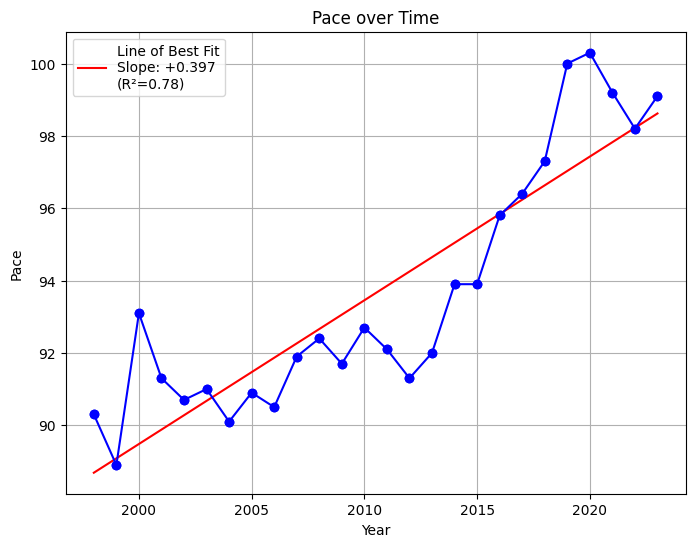

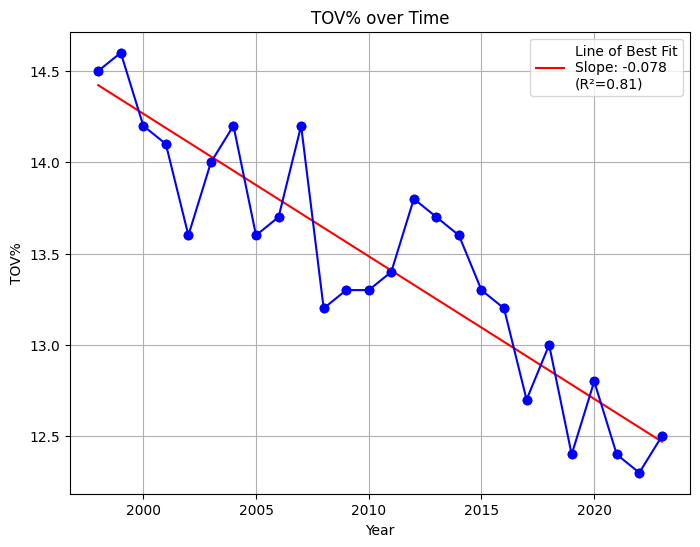

In [20]:
# convert data to floats
data[['Pace', 'TOV%']] = data[['Pace', 'TOV%']].astype(float)

def format_slope(slope):
    if slope > 0:
        return f'+{slope:.3f}'
    else:
        return f'{slope:.3f}'

# Plot 'Pace' by 'Year'
plt.figure(figsize=(8, 6))
plt.scatter(data['Year'], data['Pace'], color='blue')
slope, intercept, r_value, p_value, std_err = linregress(data['Year'], data['Pace'])
line = slope * data['Year'] + intercept
plt.plot(data['Year'], line, color='red', label=f'Line of Best Fit\nSlope: {format_slope(slope)}\n(R²={r_value**2:.2f})')
plt.plot(data['Year'], data['Pace'], marker='o', color='blue', linestyle='-')
plt.title('Pace over Time')
plt.xlabel('Year')
plt.ylabel('Pace')
plt.legend()
plt.grid(True)
plt.show()

# Plot 'TOV%' by 'Year'
plt.figure(figsize=(8, 6))
plt.scatter(data['Year'], data['TOV%'], color='blue')
slope, intercept, r_value, p_value, std_err = linregress(data['Year'], data['TOV%'])
line = slope * data['Year'] + intercept
plt.plot(data['Year'], line, color='red', label=f'Line of Best Fit\nSlope: {format_slope(slope)}\n(R²={r_value**2:.2f})')
plt.plot(data['Year'], data['TOV%'], marker='o', color='blue', linestyle='-')
plt.title('TOV% over Time')
plt.xlabel('Year')
plt.ylabel('TOV%')
plt.legend()
plt.grid(True)
plt.show()